<a href="https://colab.research.google.com/github/LuizFelipe2812/Mestrado_FACOM/blob/main/Implementa%C3%A7%C3%A3o_CNN_Luiz_Felipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos ResNet - Teste

In [1]:
# import os, re, time, json
# import PIL.Image, PIL.ImageFont, PIL.ImageDraw
# import numpy as np
# try:
#   # %tensorflow_version only exists in Colab.
#   %tensorflow_version 2.x
# except Exception:
#   pass
# import tensorflow as tf
# from tensorflow.keras.applications.resnet50 import ResNet50
# from matplotlib import pyplot as plt
# import tensorflow_datasets as tfds

# print("Tensorflow version " + tf.__version__)

In [2]:
# BATCH_SIZE = 32
# classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# plt.rc('image', cmap='gray')
# plt.rc('grid', linewidth=0)
# plt.rc('xtick', top=False, bottom=False, labelsize='large')
# plt.rc('ytick', left=False, right=False, labelsize='large')
# plt.rc('axes', facecolor='F8F8F8', titlesize="large", edgecolor='white')
# plt.rc('text', color='a8151a')
# plt.rc('figure', facecolor='F0F0F0')# Matplotlib fonts
# MATPLOTLIB_FONT_DIR = os.path.join(os.path.dirname(plt.__file__), "mpl-data/fonts/ttf")


# def display_images(digits, predictions, labels, title):

#   n = 10

#   indexes = np.random.choice(len(predictions), size=n)
#   n_digits = digits[indexes]
#   n_predictions = predictions[indexes]
#   n_predictions = n_predictions.reshape((n,))
#   n_labels = labels[indexes]

#   fig = plt.figure(figsize=(20, 4))
#   plt.title(title)
#   plt.yticks([])
#   plt.xticks([])

#   for i in range(10):
#     ax = fig.add_subplot(1, 10, i+1)
#     class_index = n_predictions[i]

#     plt.xlabel(classes[class_index])
#     plt.xticks([])
#     plt.yticks([])
#     plt.imshow(n_digits[i])

# # utility to display training and validation curves
# def plot_metrics(metric_name, title, ylim=5):
#   plt.title(title)
#   plt.ylim(0,ylim)
#   plt.plot(history.history[metric_name],color='blue',label=metric_name)
#   plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)

In [4]:
# (training_images, training_labels) , (validation_images, validation_labels) = tf.keras.datasets.cifar10.load_data()

In [5]:
# display_images(training_images, training_labels, training_labels, "Training Data" )

In [6]:
# display_images(validation_images, validation_labels, validation_labels, "Training Data" )

In [7]:
# def preprocess_image_input(input_images):
#   input_images = input_images.astype('float32')
#   output_ims = tf.keras.applications.resnet50.preprocess_input(input_images)
#   return output_ims


# train_X = preprocess_image_input(training_images)
# valid_X = preprocess_image_input(validation_images)

In [8]:
# # Realizar o treinamento sem imagenet e com imagenet (Comparativo)
# # Realizar teste com aumento de dados e sem aumento de dados


# '''
# A extração de características é realizada pela ResNet50 pré-treinada em pesos da imagenet.
# O tamanho de entrada é 224 x 224.
# '''

# def feature_extractor(inputs):

#   feature_extractor = tf.keras.applications.resnet.ResNet50(input_shape=(224, 224, 3),
#                                                include_top=False,
#                                                weights='imagenet')(inputs)
#   return feature_extractor


# '''
# Define as camadas densas finais e a camada softmax subsequente para classificação.
# '''

# def classifier(inputs):
#     x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
#     x = tf.keras.layers.Flatten()(x)
#     x = tf.keras.layers.Dense(1024, activation="relu")(x)
#     x = tf.keras.layers.Dense(512, activation="relu")(x)
#     x = tf.keras.layers.Dense(10, activation="softmax", name="classification")(x)
#     return x

# '''
# Como o tamanho da imagem de entrada é (32 x 32), primeiro aumente a resolução da imagem
# pelo fator de (7x7) para transformá-la em (224 x 224)
# Conecte as camadas de extração de características e o "classificador" para construir o modelo.
# '''

# def final_model(inputs):

#     resize = tf.keras.layers.UpSampling2D(size=(7,7))(inputs)

#     resnet_feature_extractor = feature_extractor(resize)
#     classification_output = classifier(resnet_feature_extractor)

#     return classification_output

# '''
# Define o modelo
# Usa o gradiente estocástico descente como otimizador.
# Usa Sparse Categorical CrossEntropy como função de perda.
# '''

# def define_compile_model():
#   inputs = tf.keras.layers.Input(shape=(32,32,3))

#   classification_output = final_model(inputs)
#   model = tf.keras.Model(inputs=inputs, outputs = classification_output)

#   model.compile(optimizer='SGD',
#                 loss='sparse_categorical_crossentropy',
#                 metrics = ['accuracy'])

#   return model


# model = define_compile_model()

# model.summary()

In [9]:
# EPOCHS = 1
# history = model.fit(train_X, training_labels,
#                     epochs=EPOCHS,
#                     validation_data = (valid_X, validation_labels),
#                     batch_size=64)

In [10]:
# loss, accuracy = model.evaluate(valid_X, validation_labels, batch_size=64)

In [11]:
# plot_metrics("loss", "Loss")
# plot_metrics("accuracy", "Accuracy")

# Modelos V2

In [12]:
"""
https://github.com/nachi-hebbar/Transfer-Learning-ResNet-Keras/blob/main/ResNet_50.ipynb

https://www.tensorflow.org/tutorials/images/transfer_learning?hl=pt-br

https://github.com/tensorflow/docs/blob/master/site/en/tutorials/images/transfer_learning.ipynb
"""

import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [13]:
# Carregando o banco de dados
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 8s 0us/step


In [14]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [15]:
# Definindo parâmetros

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [16]:
# Configurando dataset para performance da rede


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [17]:
# Padronização dos dados

normalization_layer = layers.Rescaling(1./255)

In [18]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [19]:
# Criando o modelo da rede


num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [20]:
# Compilando o modelo

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 107s 1s/step - loss: 1.3058 - accuracy: 0.4448 - val_loss: 1.1495 - val_accuracy: 0.5191
Epoch 2/50
92/92 [==============================] - 99s 1s/step - loss: 1.0212 - accuracy: 0.5971 - val_loss: 0.9877 - val_accuracy: 0.6022
Epoch 3/50
92/92 [==============================] - 102s 1s/step - loss: 0.8416 - accuracy: 0.6730 - val_loss: 0.9810 - val_accuracy: 0.6526
Epoch 4/50
92/92 [==============================] - 101s 1s/step - loss: 0.6627 - accuracy: 0.7500 - val_loss: 0.9881 - val_accuracy: 0.6253
Epoch 5/50
92/92 [==============================] - 97s 1s/step - loss: 0.4195 - accuracy: 0.8532 - val_loss: 1.0364 - val_accuracy: 0.6471
Epoch 6/50
92/92 [==============================] - 100s 1s/step - loss: 0.2750 - accuracy: 0.9135 - val_loss: 1.3108 - val_accuracy: 0.6458
Epoch 7/50
92/92 [==============================] - 93s 1s/step - loss: 0.1557 - accuracy: 0.9527 - val_loss: 1.3666 - val_accuracy: 0.6349
Epoch 8/50
92/92

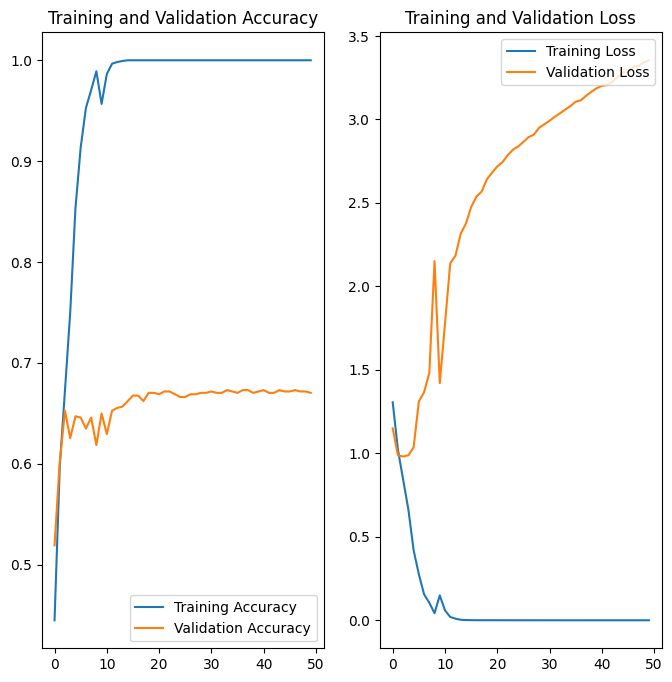

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Modelo V2 - Data Augmentation

In [23]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [24]:
# Carregando o banco de dados
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [25]:
# Definindo parâmetros

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [26]:
# Configurando dataset para performance da rede


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [27]:
# Padronização dos dados

normalization_layer = layers.Rescaling(1./255)

In [28]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99028325


In [29]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [30]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


In [31]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 110s 1s/step - loss: 1.2600 - accuracy: 0.4469 - val_loss: 1.0705 - val_accuracy: 0.5422
Epoch 2/50
92/92 [==============================] - 102s 1s/step - loss: 1.0150 - accuracy: 0.5991 - val_loss: 0.9376 - val_accuracy: 0.6267
Epoch 3/50
92/92 [==============================] - 106s 1s/step - loss: 0.9116 - accuracy: 0.6465 - val_loss: 0.8634 - val_accuracy: 0.6526
Epoch 4/50
92/92 [==============================] - 101s 1s/step - loss: 0.8561 - accuracy: 0.6723 - val_loss: 0.8702 - val_accuracy: 0.6717
Epoch 5/50
92/92 [==============================] - 106s 1s/step - loss: 0.7846 - accuracy: 0.6969 - val_loss: 0.8270 - val_accuracy: 0.6880
Epoch 6/50
92/92 [==============================] - 107s 1s/step - loss: 0.7347 - accuracy: 0.7180 - val_loss: 0.7701 - val_accuracy: 0.6866
Epoch 7/50
92/92 [==============================] - 100s 1s/step - loss: 0.6975 - accuracy: 0.7415 - val_loss: 0.7505 - val_accuracy: 0.7125
Epoch 8/50
92

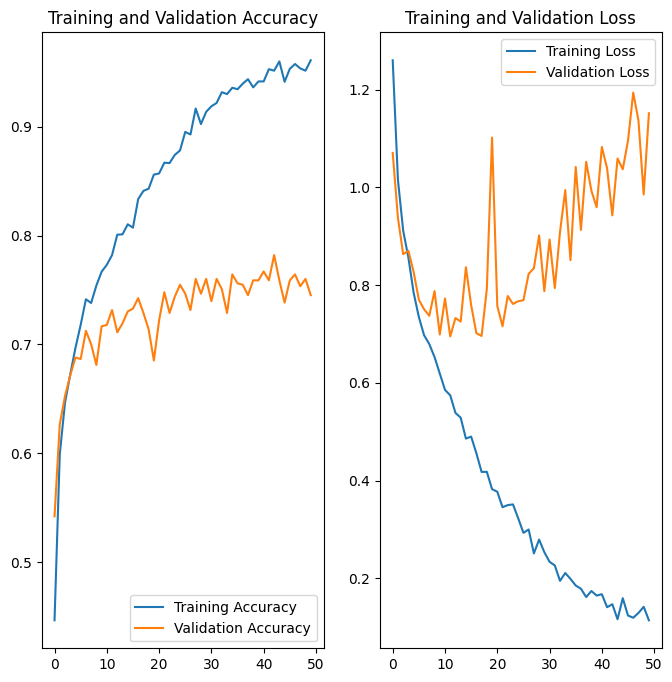

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Modelo V2 - Dropout

In [17]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [18]:
# Carregando o banco de dados
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [11]:
# Definindo parâmetros

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [19]:
# Configurando dataset para performance da rede


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [20]:
# Padronização dos dados

normalization_layer = layers.Rescaling(1./255)

In [21]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.93519604


In [22]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [23]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 73s 782ms/step - loss: 1.3427 - accuracy: 0.4149 - val_loss: 1.1151 - val_accuracy: 0.5504
Epoch 2/50
92/92 [==============================] - 71s 774ms/step - loss: 1.0478 - accuracy: 0.5828 - val_loss: 1.0371 - val_accuracy: 0.6022
Epoch 3/50
92/92 [==============================] - 69s 753ms/step - loss: 0.9450 - accuracy: 0.6304 - val_loss: 0.9803 - val_accuracy: 0.6226
Epoch 4/50
92/92 [==============================] - 70s 762ms/step - loss: 0.8735 - accuracy: 0.6655 - val_loss: 0.8838 - val_accuracy: 0.6717
Epoch 5/50
92/92 [==============================] - 68s 740ms/step - loss: 0.8167 - accuracy: 0.6860 - val_loss: 0.8544 - val_accuracy: 0.6649
Epoch 6/50
92/92 [==============================] - 66s 724ms/step - loss: 0.7745 - accuracy: 0.6975 - val_loss: 0.8201 - val_accuracy: 0.6744
Epoch 7/50
92/92 [==============================] - 68s 742ms/step - loss: 0.7379 - accuracy: 0.7170 - val_loss: 0.8948 - val_accuracy: 0.6362

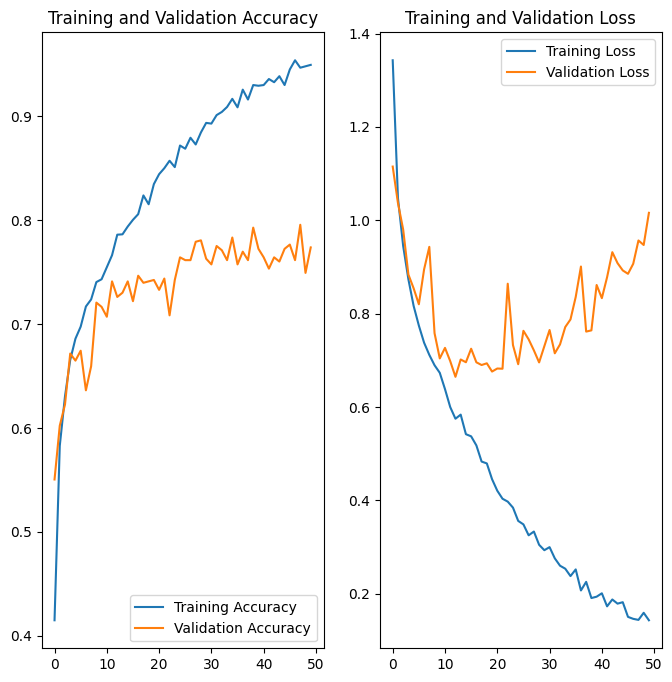

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Modelo V2 - Transfer Learning

In [41]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [42]:
# Carregando o banco de dados
import pathlib

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos.tar', origin=dataset_url, extract=True)
data_dir = pathlib.Path(data_dir).with_suffix('')

In [43]:
# Definindo parâmetros

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [44]:
# Configurando dataset para performance da rede


AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
# Padronização dos dados

normalization_layer = layers.Rescaling(1./255)

In [46]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.99803925


In [47]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [48]:
base_model = ResNet50(input_shape=(img_height, img_width, 3),
                      include_top=False,
                      weights='imagenet')

# Congelando as camadas do modelo base
base_model.trainable = False

In [49]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  base_model,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [50]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [51]:
epochs = 10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 332s 4s/step - loss: 1.5739 - accuracy: 0.2813 - val_loss: 1.5169 - val_accuracy: 0.3351
Epoch 2/10
92/92 [==============================] - 342s 4s/step - loss: 1.5253 - accuracy: 0.3273 - val_loss: 1.5282 - val_accuracy: 0.3529
Epoch 3/10
92/92 [==============================] - 346s 4s/step - loss: 1.5164 - accuracy: 0.3426 - val_loss: 1.4970 - val_accuracy: 0.3433
Epoch 4/10
92/92 [==============================] - 326s 4s/step - loss: 1.4961 - accuracy: 0.3406 - val_loss: 1.4717 - val_accuracy: 0.3842
Epoch 5/10
92/92 [==============================] - 345s 4s/step - loss: 1.4625 - accuracy: 0.3801 - val_loss: 1.4647 - val_accuracy: 0.3651
Epoch 6/10
92/92 [==============================] - 347s 4s/step - loss: 1.4514 - accuracy: 0.3781 - val_loss: 1.4774 - val_accuracy: 0.3706
Epoch 7/10
92/92 [==============================] - 346s 4s/step - loss: 1.4499 - accuracy: 0.3777 - val_loss: 1.4777 - val_accuracy: 0.3501
Epoch 8/10
92

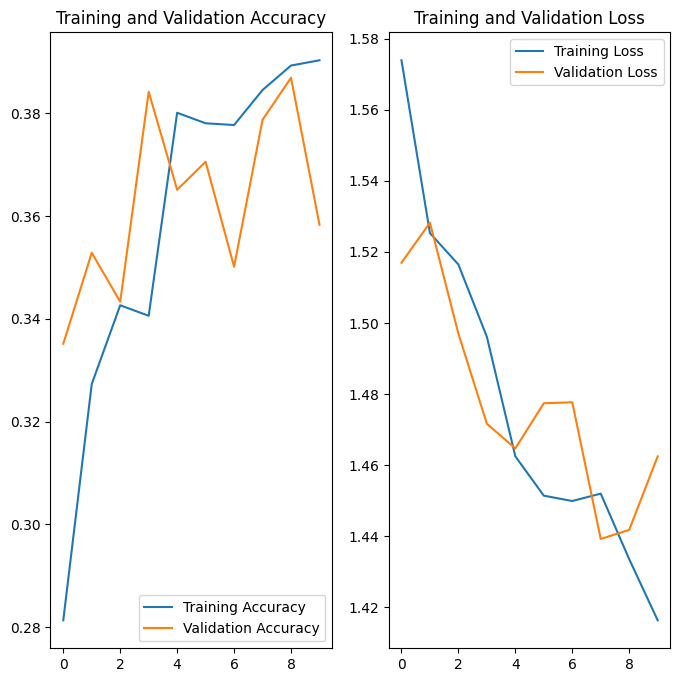

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()